<center><a href="https://ibb.co/cJD6pSW"><img src="https://i.ibb.co/y0W6Mcz/cover-depan.jpg" alt="cover-depan" border="0"></a>

# Klasifikasi Prediksi Pinjaman Bank
Mentor: Mega Bagus Herlambang, PhD

<hr>

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [2]:
# Load dataset
df = pd.read_csv('credit_train.csv')

# Melihat dimensi df
print(df.shape)

# Melihat tampilan df
df.head()

(100514, 19)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
# Melihat summary df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
# Mengecek data yang terduplikasi
df.duplicated().sum()

10728

Cukup banyak baris data duplikat. Kita hilangkan baris-baris ini.

In [5]:
# Membuang baris duplikat
df.drop_duplicates(subset=['Customer ID'], inplace=True)

In [6]:
# Mengecek data yang terduplikasi
df.duplicated().sum()

0

In [7]:
# Melihat dimensi data
df.shape

(82000, 19)

Setelah dicek terdapat 514 baris kosong untuk semua kolom.<br>
Maka kita buang semua baris kosong ini (panduannya pada kolom Loan Status sebagai target).

In [8]:
# Cek baris kosong
df['Loan Status'].isna().sum()

1

In [9]:
# Buang baris kosong berpatokan kepada Loan Status
df.dropna(subset=['Loan Status'], inplace=True)

In [10]:
# Melihat datanya lagi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81999 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       81999 non-null  object 
 1   Customer ID                   81999 non-null  object 
 2   Loan Status                   81999 non-null  object 
 3   Current Loan Amount           81999 non-null  float64
 4   Term                          81999 non-null  object 
 5   Credit Score                  64968 non-null  float64
 6   Annual Income                 64968 non-null  float64
 7   Years in current job          78491 non-null  object 
 8   Home Ownership                81999 non-null  object 
 9   Purpose                       81999 non-null  object 
 10  Monthly Debt                  81999 non-null  float64
 11  Years of Credit History       81999 non-null  float64
 12  Months since last delinquent  37378 non-null  float64
 13  N

In [11]:
# Melihat df
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [12]:
# Membuang kolom Loan ID dan Customer ID
df.drop(columns = ['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [13]:
# Melihat ringkasan data
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.199900e+04,64968.000000,6.496800e+04,81999.000000,81999.000000,37378.000000,81999.000000,81999.000000,8.199900e+04,8.199700e+04,81824.000000,81991.000000
mean,1.208640e+07,1168.410741,1.376776e+06,18330.633110,18.296783,35.064236,11.114489,0.161441,2.936203e+05,7.935358e+05,0.113463,0.028064
std,3.217953e+07,1632.676553,1.121542e+06,12127.700801,7.043774,22.021222,4.981266,0.473148,3.726145e+05,9.208747e+06,0.344674,0.254642
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.792560e+05,711.000000,8.473050e+05,10117.595000,13.500000,16.000000,8.000000,0.000000,1.133160e+05,2.804560e+05,0.000000,0.000000
50%,3.077800e+05,731.000000,1.169592e+06,16075.330000,17.000000,32.000000,10.000000,0.000000,2.099310e+05,4.777740e+05,0.000000,0.000000
75%,5.194530e+05,743.000000,1.649438e+06,23811.370000,21.800000,51.000000,14.000000,0.000000,3.669945e+05,7.984900e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [14]:
# Melihat nilai unique dari kolom 'Bankruptcies' dan 'Tax Liens'
print(df['Bankruptcies'].unique())
print(df['Tax Liens'].unique())

[ 1.  0.  2.  3. nan  5.  4.  7.  6.]
[ 0.  1.  2.  4.  3.  6.  5. nan 11. 15.  9.  7. 10.]


Sepertinya kolom 'Bankruptcies'  seharusnya bertipe kategori. Kita akan ubah nanti menjadi kategori.

In [15]:
# Melihat kategori pada target
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
# Melihat proporsi data
print(df['Loan Status'].value_counts()/len(df['Loan Status']))

Fully Paid     0.723911
Charged Off    0.276089
Name: Loan Status, dtype: float64


Jumlah proporsi bernilai 0 (Fully Paid) : 0.72
Jumlah proporsi bernilai 1 (Charged Off) : 0.28


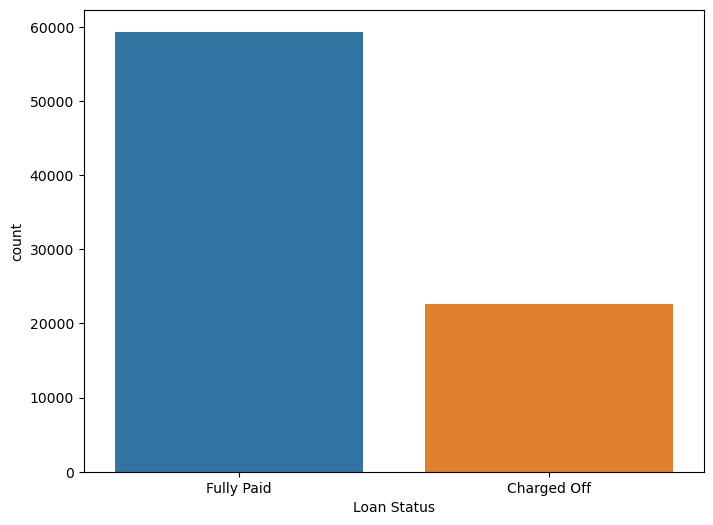

In [17]:
# Melihat proporsi kategori di label apakah balanced atau tidak
plt.figure(figsize=(8,6))
sns.countplot(x = df['Loan Status']);

# Mencetak proporsinya
print('Jumlah proporsi bernilai 0 (Fully Paid) : %.2f' % (df['Loan Status'].value_counts()[0] / len(df)))
print('Jumlah proporsi bernilai 1 (Charged Off) : %.2f' % (df['Loan Status'].value_counts()[1] / len(df)))

Datanya tampak tidak balanced, maka harus diseimbangkan terlebih dahulu.

In [18]:
# Merubah kolom 'Bankruptcies' menjadi kategori
df['Bankruptcies'] = df['Bankruptcies'].astype('category') 

In [19]:
# Merubah kolom 'Loan Status' menjadi angka 0 dan 1
df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 0, 'Charged Off': 1}).astype('category')

In [20]:
# Mengecek apakah sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81999 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Loan Status                   81999 non-null  category
 1   Current Loan Amount           81999 non-null  float64 
 2   Term                          81999 non-null  object  
 3   Credit Score                  64968 non-null  float64 
 4   Annual Income                 64968 non-null  float64 
 5   Years in current job          78491 non-null  object  
 6   Home Ownership                81999 non-null  object  
 7   Purpose                       81999 non-null  object  
 8   Monthly Debt                  81999 non-null  float64 
 9   Years of Credit History       81999 non-null  float64 
 10  Months since last delinquent  37378 non-null  float64 
 11  Number of Open Accounts       81999 non-null  float64 
 12  Number of Credit Problems     81999 non-null  

In [21]:
# Melihat kolom kategori bertipe 'object'
kategori = [var for var in df.columns if df[var].dtype == 'O']

# Melihat tipe data kategori
print(kategori)

['Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [22]:
# Mengganti semua tipe data 'object' ke 'category'
for i in kategori:
    df[i] = df[i].astype('category')

In [23]:
# Melihat kolom df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81999 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Loan Status                   81999 non-null  category
 1   Current Loan Amount           81999 non-null  float64 
 2   Term                          81999 non-null  category
 3   Credit Score                  64968 non-null  float64 
 4   Annual Income                 64968 non-null  float64 
 5   Years in current job          78491 non-null  category
 6   Home Ownership                81999 non-null  category
 7   Purpose                       81999 non-null  category
 8   Monthly Debt                  81999 non-null  float64 
 9   Years of Credit History       81999 non-null  float64 
 10  Months since last delinquent  37378 non-null  float64 
 11  Number of Open Accounts       81999 non-null  float64 
 12  Number of Credit Problems     81999 non-null  

In [24]:
# Melihat df
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [25]:
# Ringkasan variabel numerik
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
count,8.199900e+04,64968.000000,6.496800e+04,81999.000000,81999.000000,37378.000000,81999.000000,81999.000000,8.199900e+04,8.199700e+04,81991.000000
mean,1.208640e+07,1168.410741,1.376776e+06,18330.633110,18.296783,35.064236,11.114489,0.161441,2.936203e+05,7.935358e+05,0.028064
std,3.217953e+07,1632.676553,1.121542e+06,12127.700801,7.043774,22.021222,4.981266,0.473148,3.726145e+05,9.208747e+06,0.254642
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.792560e+05,711.000000,8.473050e+05,10117.595000,13.500000,16.000000,8.000000,0.000000,1.133160e+05,2.804560e+05,0.000000
50%,3.077800e+05,731.000000,1.169592e+06,16075.330000,17.000000,32.000000,10.000000,0.000000,2.099310e+05,4.777740e+05,0.000000
75%,5.194530e+05,743.000000,1.649438e+06,23811.370000,21.800000,51.000000,14.000000,0.000000,3.669945e+05,7.984900e+05,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,15.000000


In [26]:
# Ringkasan variabel kategori
df.describe(include='category')

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Bankruptcies
count,81999,81999,78491,81999,81999,81824.0
unique,2,2,11,4,16,8.0
top,0,Short Term,10+ years,Home Mortgage,Debt Consolidation,0.0
freq,59360,61387,25271,39879,64907,73101.0


In [27]:
# Mengecek data kosong
df.isnull().mean()

Loan Status                     0.000000
Current Loan Amount             0.000000
Term                            0.000000
Credit Score                    0.207698
Annual Income                   0.207698
Years in current job            0.042781
Home Ownership                  0.000000
Purpose                         0.000000
Monthly Debt                    0.000000
Years of Credit History         0.000000
Months since last delinquent    0.544165
Number of Open Accounts         0.000000
Number of Credit Problems       0.000000
Current Credit Balance          0.000000
Maximum Open Credit             0.000024
Bankruptcies                    0.002134
Tax Liens                       0.000098
dtype: float64

Kolom 'Months since last delinquent' tidak bisa diselamatkan karena baris yang hilang di atas 50%. Kita buang saja.

In [28]:
# Membuang kolom 'Months since last delinquent'
df.drop(labels = ['Months since last delinquent'], axis=1, inplace=True)

In [29]:
# Mengecek data kosong
df.isnull().mean()

Loan Status                  0.000000
Current Loan Amount          0.000000
Term                         0.000000
Credit Score                 0.207698
Annual Income                0.207698
Years in current job         0.042781
Home Ownership               0.000000
Purpose                      0.000000
Monthly Debt                 0.000000
Years of Credit History      0.000000
Number of Open Accounts      0.000000
Number of Credit Problems    0.000000
Current Credit Balance       0.000000
Maximum Open Credit          0.000024
Bankruptcies                 0.002134
Tax Liens                    0.000098
dtype: float64

In [30]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype == 'category' and var!='Loan Status']
var_numerik = [var for var in df.columns if df[var].dtype!='category' and var!='Loan Status']

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

['Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Bankruptcies']
['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens']


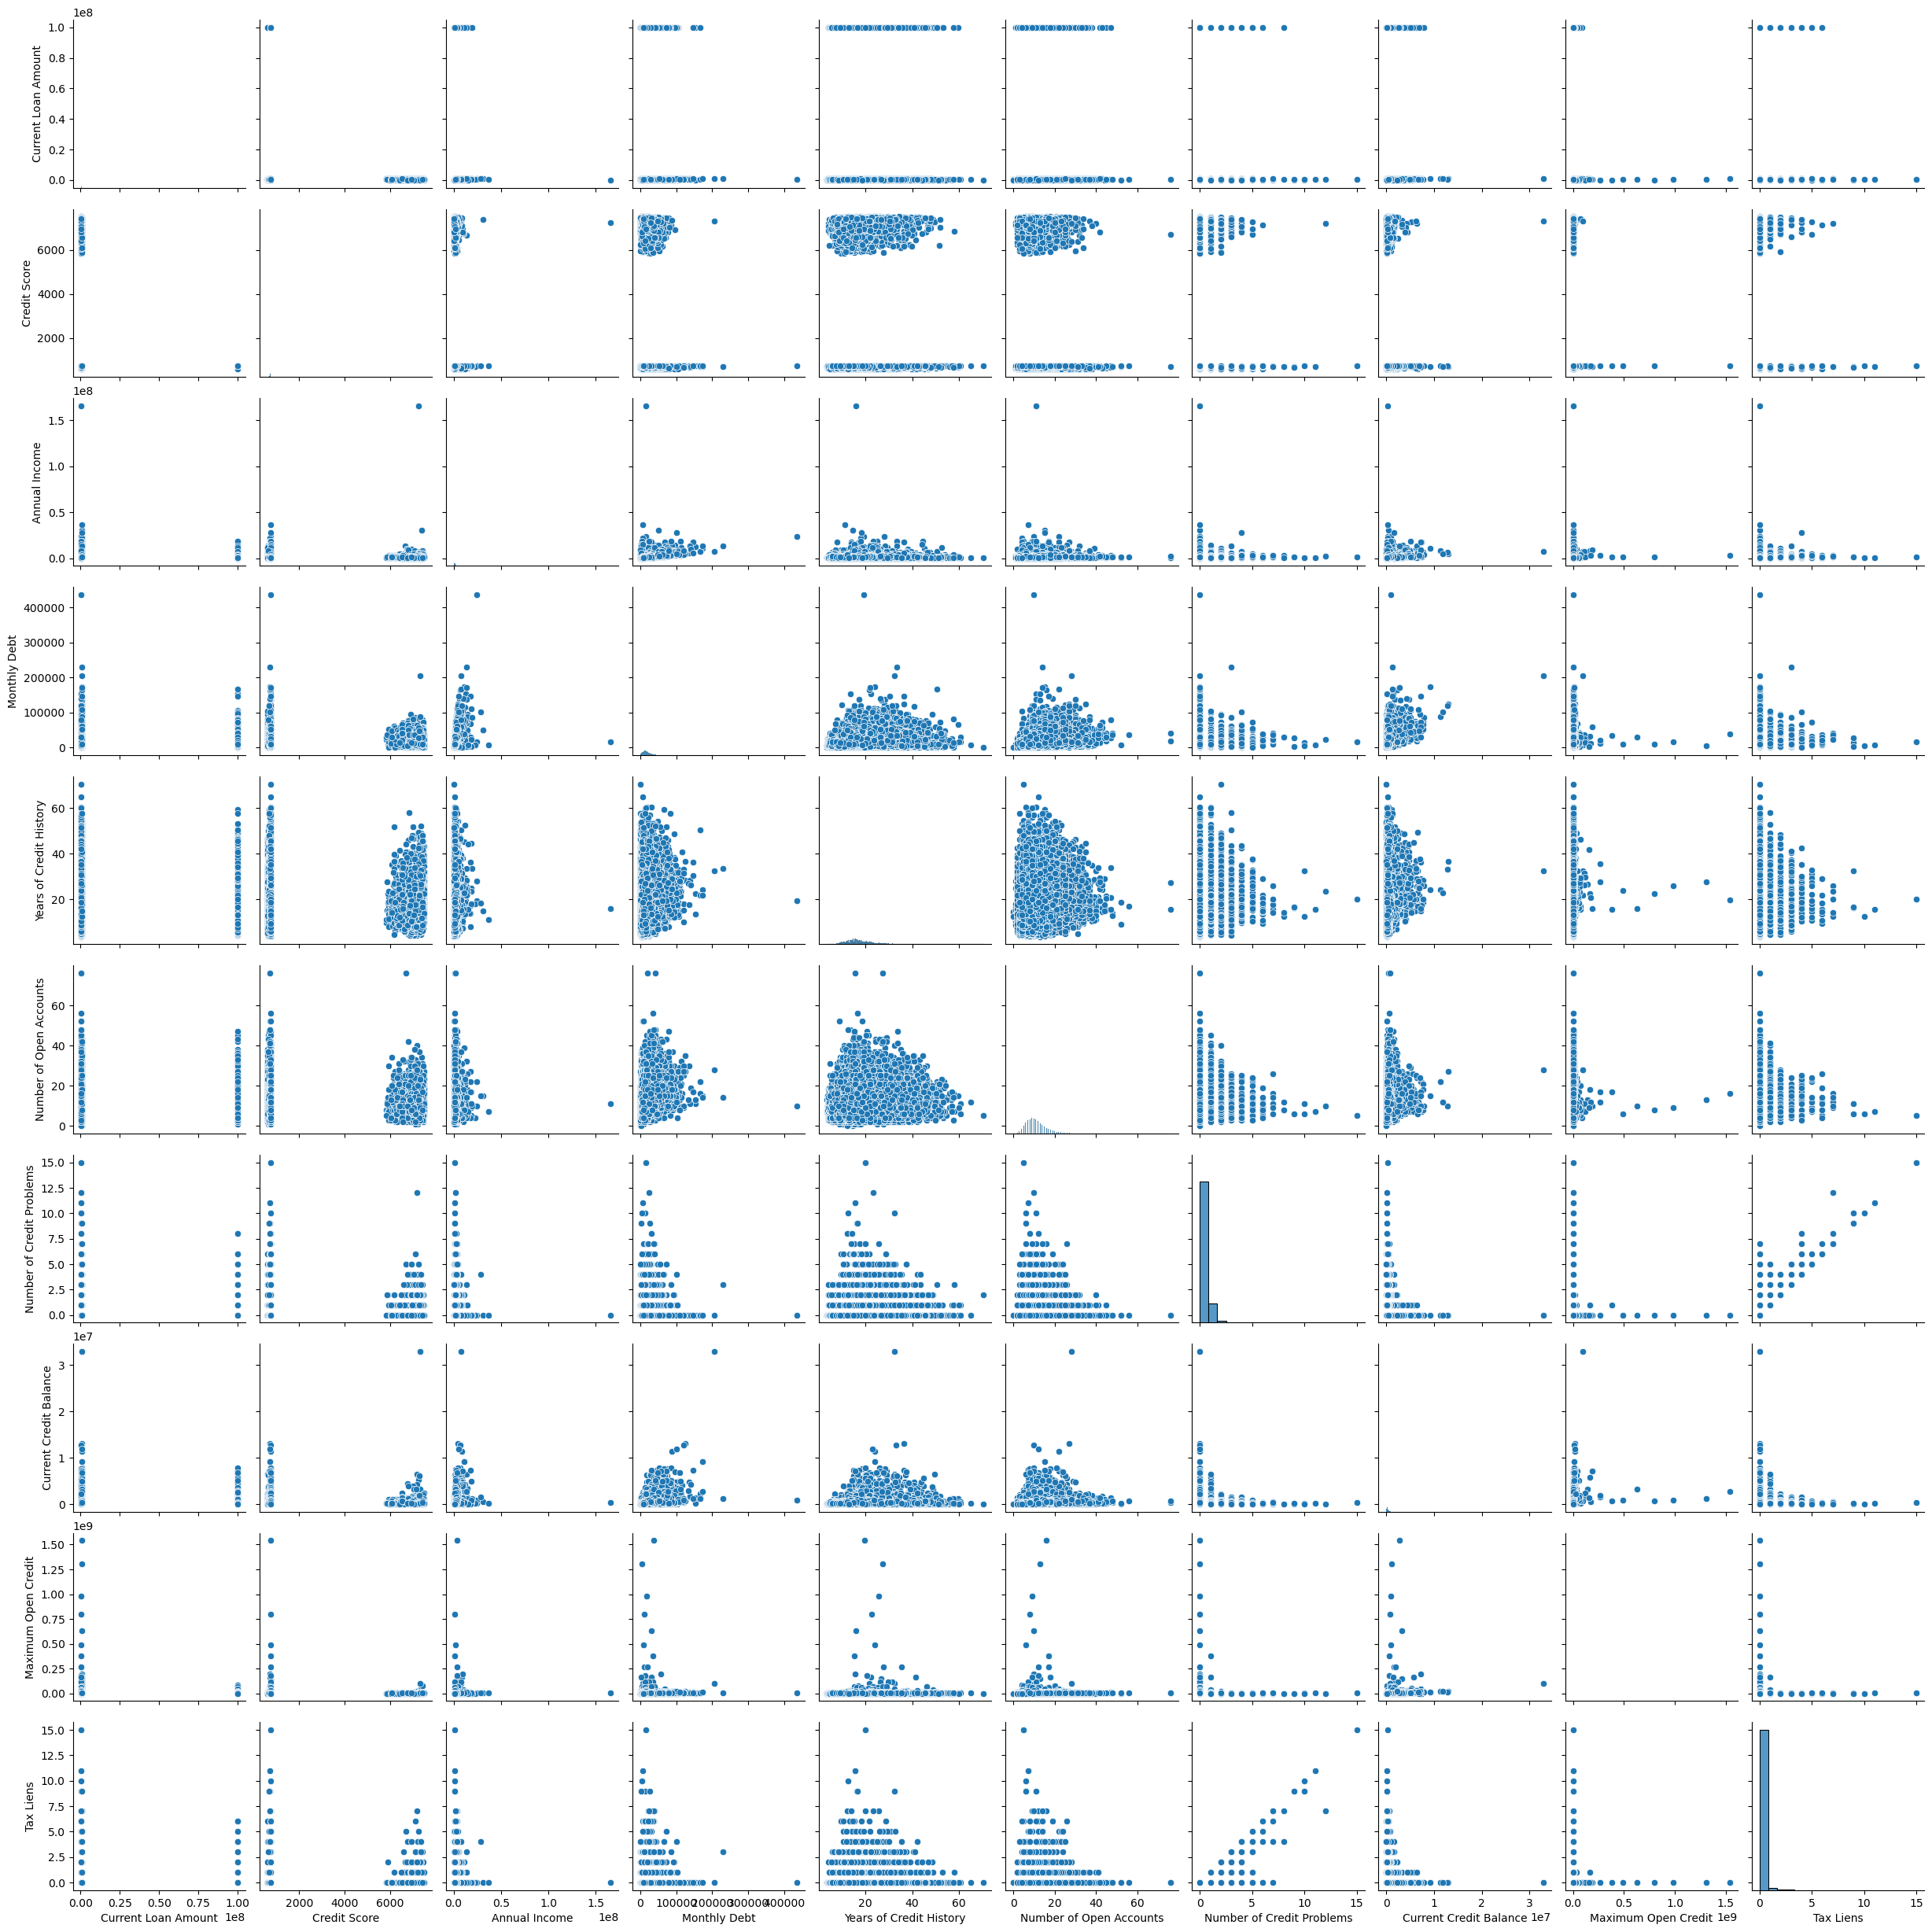

In [31]:
# Melihat pairplot
sns.pairplot(df)

C:\Users\mega_\AppData\Local\Temp\ipykernel_24836\1450803630.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

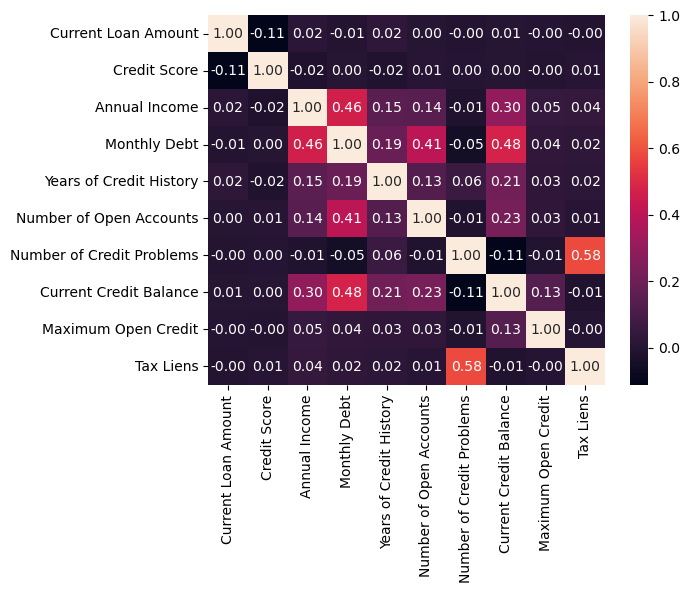

In [48]:
# Melihat skor korelasi
sns.heatmap(df.corr(), annot=True, fmt=".2f")

<br>

### Menentukan variabel independen (X) dan variabel dependen (y)

In [49]:
# Mendefinisikan variabel dependen (y) dan variabel independen (X)
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [50]:
# Melihat X
X.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [51]:
# Melihat y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Loan Status, dtype: category
Categories (2, int64): [0, 1]

<br>

### Balancing dataset

In [52]:
# Balancind dataset dengan Undersampling
ros = RandomUnderSampler(
    sampling_strategy= 'auto', # sampling minority class
    random_state= 0, # for reproducibility
    replacement=True 
)  
X_res, y_res = ros.fit_resample(X, y)

In [53]:
# Melihat proporsi yang baru
print(y_res.value_counts()/len(y_res))

0    0.5
1    0.5
Name: Loan Status, dtype: float64


In [54]:
# Melihat dimensi data
print(X_res.shape)
print(y_res.shape)

(45278, 15)
(45278,)


<br>

### Splitting dataset

In [55]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(36222, 15) (9056, 15)


In [56]:
# Reset index X_train dan X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [57]:
# Reset index y_train dan y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [58]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

Sebelum kita bandingkan beberapa model, kita coba buat 1 pipeline dengan salah satu model klasifikasi.

Kita coba menggunakan regresi logistik.

In [59]:
# Model regresi logistik
logreg = LogisticRegression(max_iter=1000)

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

In [60]:
# Fitting ke training set
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Current Loan Amount',
                                                   'Credit Score',
                                                   'Annual Income',
                                                   'Monthly Debt',
                                                   'Years of Credit History',
                                                   'Number of Open Accounts',
                                                   'Number of Credit Problems',
                                                   'Current Credit Balance',
                                                   'Maximum Open Credit',
                                                   'Tax Liens']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Term',
                                                   'Years in current job',
                                                   'Home Ownership', 'Purpose',
                                                   'Bankruptcies'])])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [61]:
# Mencoba memprediksi test set
pred_test = pipe_logreg.predict(X_test)

# Merubahnya ke format Dataframe
pred_test = pd.DataFrame(pred_test, columns=['Beli'])

# Melihat tmapilan y_pred
pred_test.head()

,Beli
0,0
1,0
2,0
3,0
4,0


In [62]:
# Membuat Confusion Matrix
cm_logreg = confusion_matrix(y_test, pred_test)
cm_logreg

array([[3382, 1116],
       [1923, 2635]], dtype=int64)

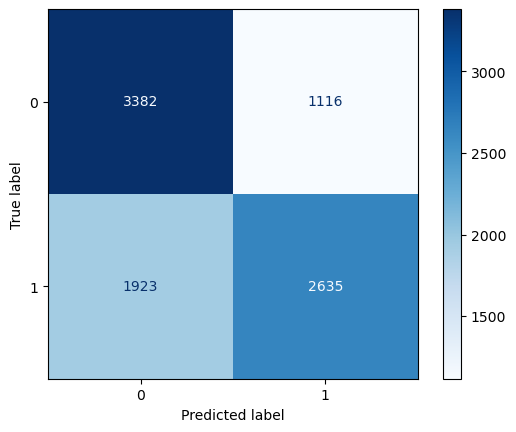

In [63]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = cm_logreg,
                                display_labels = pipe_logreg.classes_)
vis_cm.plot(cmap=plt.cm.Blues) # cm adalah singkatan dari colormap

In [64]:
# Melihat ringkasan evaluasi
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      4498
           1       0.70      0.58      0.63      4558

    accuracy                           0.66      9056
   macro avg       0.67      0.66      0.66      9056
weighted avg       0.67      0.66      0.66      9056



In [65]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi: {:.2f}'.format(precision_score(y_test, pred_test)))
print('Nilai recall: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Nilai f1: {:.2f}'.format(f1_score(y_test, pred_test)))

Nilai akurasi: 0.66
Nilai presisi: 0.70
Nilai recall: 0.58
Nilai f1: 0.63


Proses pembuatan pipeline berhasil dan tidak memunculkan *error* , sekarang kita akan mendefinisikan beberapa model kemudian diikuti dengan *hyperparameter tuning*.

#### 1. Logistic Regression

In [66]:
# Model regresi logistik
logreg = LogisticRegression(max_iter=1000)

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

# Hyperparameter tuning Logistic Regression
param_logreg = {'logreg__penalty': ['l2'],
                'logreg__C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],
                'logreg__solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
               }

<br>

#### 2. Decision Tree

In [67]:
# Model DT
dt = DecisionTreeClassifier(random_state= 0)

# Pipeline model DT
pipe_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning DT
param_dt = {'dt__min_samples_split': [2, 3, 4],
            'dt__min_samples_leaf': [1, 2, 3, 4],
            'dt__criterion': ['gini', 'entropy','log_loss'],
            'dt__max_depth':[1,2,3,4]
           }

<br>

#### 3. SVM

In [68]:
# Model SVM
svm = SVC(kernel = 'rbf', random_state = 0)

# Pipeline model SVM
pipe_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('svm', svm)
])

# Hyperparameter tuning SVM
param_svm = {'svm__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
             'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'svm__degree': [1, 2, 3, 4, 5],
             'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }

<br>

#### 4. KNN

In [69]:
# Model KNN
knn = KNeighborsClassifier()

# Pipeline model KNN
pipe_knn = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', knn),
])

# Hyperparameter tuning KNN
param_knn = {'knn__n_neighbors': [1, 2, 3, 4, 5],
             'knn__weights': ['uniform', 'distance'],
             'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

<br>

#### 5. Random Forest 

In [70]:
# Model RF
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Pipeline model RF
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf),
])

# Hyperparameter tuning RF
param_rf = {'rf__n_estimators': [200, 250, 300],
            'rf__criterion': ['gini', 'entropy', 'log_loss'],
            'rf__max_depth': [1, 2, 3, 4],
            'rf__min_samples_split': [2, 3],
            'rf__min_samples_leaf': [1, 2, 3],
            'rf__warm_start': [True]
            }

<br>

#### 6. AdaBoost

In [71]:
# Model AdaBoost
ada = AdaBoostClassifier(random_state=0)

# Pipeline model AdaBoost
pipe_ada = Pipeline([
    ('preprocessing', preprocessor),
    ('ada', ada),
])

# Hyperparameter tuning AdaBoost
param_ada = {'ada__n_estimators': [10, 20, 30, 50, 70],
             'ada__learning_rate': [0.3, 0.4, 0.5, 1, 1.1],
             'ada__algorithm': ['SAMME', 'SAMME.R'],
             }

<br>

#### 7. Gradient Boosting

In [72]:
# Model regresi XGBoost
gb = GradientBoostingClassifier(random_state=0)

# Pipeline model regresi XGBoost
pipe_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('gb',gb)
])

# Hyperparameter tuning regresi XGBoost
param_gb = {'gb__loss': ['log_loss', 'deviance', 'exponential'],
            'gb__learning_rate': [0.1, 0.3, 0.4, 0.5, 1, 1.1],
            'gb__n_estimators': [10, 20, 30, 50, 70]}

<br>

#### 8. XGBoost

In [73]:
# Model regresi LightGBM
xgb = XGBClassifier(eval_metric='logloss', random_state=0)

# pipeline model
pipe_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', xgb),
])

# hyperparameter tuning
param_xgb = {'xgb__learning_rate': [0.05, 0.1, 0.2],
             'xgb__max_depth': [5, 7, 9],
             'xgb__gamma': [0, 0.1, 0.2]
            }

<br>

## Pipeline dan Cross Validation

Sekarang saatnya melakukan model *training* dengan *cross validation*.

Daftar metrik yang bisa dipakai menggunakan perintah <code>cross_val_score()</code>:<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [74]:
# Model training dengan cross validation
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
mean_akurasi = []
mean_auc = []
std_akurasi = []
std_auc = []
test_score_akurasi = []
test_score_auc = []

# Kita setting agar proses cross validasi dilakukan dengan sama rata (stratified) untuk pembagian kategori labelnya
skf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv = skf

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor akurasi
    cv_akurasi = cross_val_score(i, X_train, y_train, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_auc = cross_val_score(i, X_train, y_train, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
    
    # Menghitung nilai rata-rata akurasi dan menambahkannya ke variabel mean_akurasi
    mean_akurasi.append(round(cv_akurasi.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_auc.append(round(cv_auc.mean(),2))

    # Menghitung nilai standar deviasi akurasi dan menambahkannya ke variabel std_akurasi
    std_akurasi.append(round(cv_akurasi.std(),2))
    std_auc.append(round(cv_auc.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata akurasi di test set dan menambahkannya ke variabel test_score_akurasi
    test_score_akurasi.append(round(accuracy_score(y_test, i_predict),2))
    test_score_auc.append(round(roc_auc_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

In [75]:
# Membuat DataFrame
cv_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_akurasi, 'std':std_akurasi, 'Test_Score':test_score_akurasi})
cv_auc = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_auc, 'std':std_auc, 'Test_Score':test_score_auc})

In [76]:
# Melihat hasil cross validation berdasarkan akurasi
cv_akurasi

,model,Train_Mean,std,Test_Score
0,logreg,0.67,0.00,0.66
1,dt,0.67,0.00,0.69
2,svm,0.66,0.00,0.66
3,knn,0.64,0.00,0.63
4,rf,0.71,0.01,0.72
5,ada,0.69,0.00,0.68
6,gb,0.69,0.00,0.69
7,xgb,0.69,0.00,0.70


In [77]:
# Melihat hasil cross validation berdasarkan akurasi
cv_auc

,model,Train_Mean,std,Test_Score
0,logreg,0.75,0.00,0.66
1,dt,0.67,0.00,0.69
2,svm,0.74,0.00,0.66
3,knn,0.70,0.00,0.63
4,rf,0.81,0.01,0.72
5,ada,0.78,0.00,0.68
6,gb,0.78,0.00,0.69
7,xgb,0.78,0.00,0.70


In [78]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor akurasi
cv_akurasi_urut = cv_akurasi.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_akurasi_urut

,model,Train_Mean,std,Test_Score
0,rf,0.71,0.01,0.72
1,xgb,0.69,0.00,0.70
2,gb,0.69,0.00,0.69
3,ada,0.69,0.00,0.68
4,dt,0.67,0.00,0.69
5,logreg,0.67,0.00,0.66
6,svm,0.66,0.00,0.66
7,knn,0.64,0.00,0.63


In [79]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor AUC
cv_auc_urut = cv_auc.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_auc_urut

,model,Train_Mean,std,Test_Score
0,rf,0.81,0.01,0.72
1,xgb,0.78,0.00,0.70
2,gb,0.78,0.00,0.69
3,ada,0.78,0.00,0.68
4,logreg,0.75,0.00,0.66
5,svm,0.74,0.00,0.66
6,knn,0.70,0.00,0.63
7,dt,0.67,0.00,0.69


<br>

## Hyperparameter Tuning

Kita sudah melihat bahwa model rf yang terbaik dibanding semua model, berdasarkan skor akurasi yang tinggi dan skor auc yang tinggi pula.

Namun semua model yang dibandingkan menggunakan *hyperparameter* default. 

Kita akan coba membandingkan kembali semua model tersebut dengan *setting*an *hyperparameter* yang sudah kita *tuning* dengan menggunakan <code>GridSearchCV()</code>.

<code>GridSearchCV()</code> akan mengevaluasi semua settingan dari *hyperparameter* yang sudah disiapkan dan mempertahankan *setting*-an terbaik sampai selesai (setelah mencoba semua kombinasi *hyperparameter* dan semua *fold* di *cross validation*).

In [80]:
# Model training dengan RandomSearchCV
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
daftar_param_model = [param_logreg, param_dt, param_svm, param_knn, 
                      param_rf, param_ada, param_gb, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_random_cv = RandomizedSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=3,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_random_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_random_cv.predict(X_train), columns=['Loan Status'])
    pred_test = pd.DataFrame(model_random_cv.predict(X_test), columns=['Loan Status'])

    # Mencatat skor MAE training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_random_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_random_cv.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# Model training dengan GridSearchCV
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
daftar_param_model = [param_logreg, param_dt, param_svm, param_knn, 
                      param_rf, param_ada, param_gb, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=3,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_grid_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['Loan Status'])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['Loan Status'])

    # Mencatat skor MAE training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

In [81]:
# Membuat DataFrame sekaligus kita urutkan
grid_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Training':akurasi_tuning, 'Testing':akurasi_tuning_test})
grid_akurasi_urut = grid_akurasi.sort_values(by='Testing', ascending=False,  ignore_index=True)

grid_auc = pd.DataFrame({'model':daftar_nama_model, 'Training':auc_tuning, 'Testing':auc_tuning_test})
grid_auc_urut = grid_auc.sort_values(by='Testing', ascending=False, ignore_index=True)

Kita pilih model terbaik berdasarkan performanya di *Test Set*.

In [82]:
# Melihat performa tuning berdasarkan MAE
grid_akurasi_urut

,model,Training,Testing
0,xgb,0.881619,0.701082
1,gb,0.706007,0.686948
2,ada,0.693418,0.680764
3,rf,0.681575,0.677010
4,logreg,0.667219,0.664973
5,knn,1.000000,0.663648
6,svm,0.706118,0.662655
7,dt,0.661642,0.658348


Perlu diperhatikan bahwa skor akurasi di kolom *Training* di atas adalah skor akurasi rata-rata dari *cross validation*. Begitu juga untuk nilai akurasi di kolom *Testing*.

In [83]:
# Melihat performa tuning berdasarkan R2
grid_auc_urut

,model,Training,Testing
0,xgb,0.881610,0.701158
1,gb,0.706003,0.686954
2,ada,0.693428,0.680665
3,rf,0.681513,0.677236
4,logreg,0.667070,0.665543
5,knn,1.000000,0.663966
6,svm,0.706001,0.663104
7,dt,0.661352,0.659477


Dari model di atas dapat kita lihat bahwa model terbaik adalah menggunakan AdaBoost.

Sekarang kita bisa menyimpam parameter dan estimator dari setiap model dalam format DataFrame.

In [84]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

,model,Param
0,logreg,"{'logreg__solver': 'newton-cg', 'logreg__penal..."
1,dt,"{'dt__min_samples_split': 4, 'dt__min_samples_..."
2,svm,"{'svm__kernel': 'poly', 'svm__gamma': 1, 'svm_..."
3,knn,"{'knn__weights': 'distance', 'knn__n_neighbors..."
4,rf,"{'rf__warm_start': True, 'rf__n_estimators': 2..."
5,ada,"{'ada__n_estimators': 50, 'ada__learning_rate'..."
6,gb,"{'gb__n_estimators': 30, 'gb__loss': 'exponent..."
7,xgb,"{'xgb__max_depth': 9, 'xgb__learning_rate': 0...."


In [85]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

,model,Param
0,logreg,(ColumnTransformer(transformers=[('preprocessi...
1,dt,(ColumnTransformer(transformers=[('preprocessi...
2,svm,(ColumnTransformer(transformers=[('preprocessi...
3,knn,(ColumnTransformer(transformers=[('preprocessi...
4,rf,(ColumnTransformer(transformers=[('preprocessi...
5,ada,(ColumnTransformer(transformers=[('preprocessi...
6,gb,(ColumnTransformer(transformers=[('preprocessi...
7,xgb,(ColumnTransformer(transformers=[('preprocessi...


In [86]:
# Kita gabungkan semua sebagai 'model_best'
model_best = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':akurasi_tuning_test})
model_best = model_best.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best

,model,Param,Testing
0,xgb,(ColumnTransformer(transformers=[('preprocessi...,0.701082
1,gb,(ColumnTransformer(transformers=[('preprocessi...,0.686948
2,ada,(ColumnTransformer(transformers=[('preprocessi...,0.680764
3,rf,(ColumnTransformer(transformers=[('preprocessi...,0.677010
4,logreg,(ColumnTransformer(transformers=[('preprocessi...,0.664973
5,knn,(ColumnTransformer(transformers=[('preprocessi...,0.663648
6,svm,(ColumnTransformer(transformers=[('preprocessi...,0.662655
7,dt,(ColumnTransformer(transformers=[('preprocessi...,0.658348


<br>

#### Menggunakan Model Terbaik

Sekarang kita bisa menggunakan modelnya dari <code>model_best</code>, di mana jika kita ingin memilih model terbaik maka pilih urutan pertama.

Sehingga jika kita ingin menggunakan *Random Forest*, maka pilih <code>model_best['Param'][0]</code>.

Sekarang kita harus melakukan *fitting* akhir di mana kita akan mentraining parameter dari model terbaik terhadap dataset utuh (gabungan *training set* dan *test set*).

In [87]:
# Fitting ke dataset utuh
model_final = model_best['Param'][0].fit(X_res, y_res)

Sekarang kita memiliki model akhir (`model_final`) yang sudah di*fitting* ke dataset utuh. 

Kita coba gunakan model akhir ini untuk memprediksi X_train dan X_test.

In [88]:
# Melihat spesifikasi model_final
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Current Loan Amount',
                                                   'Credit Score',
                                                   'Annual Income',
                                                   'Monthly Debt',
                                                   'Years of Credit History',
                                                   'Number of Open Accounts',
                                                   'Number of Credit Problems',
                                                   'Current Credit Balance',
                                                   'Maximum Open...
                               feature_types=None, gamma=0.1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

In [89]:
# Load data loan_test.csv
df_test = pd.read_csv('credit_test.csv')
df_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [90]:
# Memprediksi df_test
hasil = model_final.predict(df_test)
hasil

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
# Keputusan
for i in range(len(hasil)):
    if hasil[i] == 1:
        print('Data pelanggan',df_test['Loan ID'][i],'= Charge Off')
    else:
        print('Data pelanggan',df_test['Loan ID'][i],'= Fully Paid')

Data pelanggan f738779f-c726-40dc-92cf-689d73af533d = Fully Paid
Data pelanggan 6dcc0947-164d-476c-a1de-3ae7283dde0a = Fully Paid
Data pelanggan f7744d01-894b-49c3-8777-fc6431a2cff1 = Fully Paid
Data pelanggan 83721ffb-b99a-4a0f-aea5-ef472a138b41 = Fully Paid
Data pelanggan 08f3789f-5714-4b10-929d-e1527ab5e5a3 = Fully Paid
Data pelanggan a4957169-d809-44cc-847b-975400bc8d11 = Fully Paid
Data pelanggan 43467302-94fe-494b-b52f-3fd891fea71c = Charge Off
Data pelanggan 930c7cb3-6086-434a-9547-3ed41c181552 = Charge Off
Data pelanggan 0b2f1b66-741e-4e37-a929-99926cdc9e9a = Charge Off
Data pelanggan d08f3a5e-93df-40e7-bdd8-cba59180bddf = Fully Paid
Data pelanggan 3102b699-a2d2-4df4-9c33-005dc41e3525 = Fully Paid
Data pelanggan 663ad9a3-4691-4f8c-90c6-75a5f4f0b34f = Fully Paid
Data pelanggan 1e277d73-10b5-475f-8538-2a5a09d62c8d = Charge Off
Data pelanggan 79d992b7-0aa7-4059-a10b-3d416809d77e = Charge Off
Data pelanggan c3c63911-be01-410b-a20a-85cb9bb83712 = Charge Off
Data pelanggan a913063f-a

<br>

#### Menyimpan Model

Sekarang kita akan menyimpan modelnya untuk nanti bisa dipakai dan di*deploy*.

In [92]:
# Library untuk menyimpan model
import pickle

In [93]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_klasifikasi_bank_loan.pkl', 'wb'))

Sekarang kita akan coba memprediksi X_test menggunakan model yang sudah kita simpan.

In [94]:
# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_klasifikasi_bank_loan.pkl', 'rb'))

In [95]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(df_test)

# Melihat hasil prediksi
prediksi

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
# Merubah dalam format DataFrame
prediksi = pd.DataFrame(prediksi, columns=['Loan Status'])
prediksi.head()

,Loan Status
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
